# Import

In [30]:
import os
import pandas as pd
import holidays
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# trying pandas alternative for the very first time to describe datasets
# (reference: https://www.linkedin.com/posts/davide-nardini_dataanalysis-python-skimpy-activity-7297525334151688193-z0kT)
!pip install skimpy
from skimpy import skim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pan

In [3]:
# Create dir to save files
os.makedirs("data", exist_ok=True)

sp500_id = "1L16kcdAQ33NJZPGvkyN6ly_PFO6eFOBD"
euro50_id = "1BwYroL994llOrEu5_XmuGmLsQw_41AUO"

# Download files
!gdown --id {sp500_id} -O data/sp500.csv
!gdown --id {euro50_id} -O data/euro50.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1L16kcdAQ33NJZPGvkyN6ly_PFO6eFOBD
To: /content/data/sp500.csv
100% 274k/274k [00:00<00:00, 150MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BwYroL994llOrEu5_XmuGmLsQw_41AUO
To: /content/data/euro50.csv
100% 255k/255k [00:00<00:00, 121MB/s]


In [5]:
sp500 = pd.read_csv("/content/data/sp500.csv")
euro50 = pd.read_csv("/content/data/euro50.csv")

# Take a look

In [6]:
skim(sp500)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2517   │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0      ┃ p25      ┃ p50      ┃ p75       ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Open    │  0 │    0 │    288.7 │    101.2 │   153.2 │    190.4 │    262.1 │     388.3 │     523.8 │ █▆▃▃▅▁ │  │
│ │ High    │  0 │    0 │    290.3 │    101.8 │     154 │    190.9 │    263.6 │     391.2 │     524.6 │ █▆▃▃▅▁ │  │
│ │ Low     │  0 │    0 │      287 │    100.5 │   151.7 │    189.7 │    260.4 │     384.8 │     522.8 │ █▆▃▃▄▁ │  │
│ │ Close   │  0 │    0 │    288.7 │    101.2 │   153.9 │    190.4 │    262.7 │     388.5 │     523.2 │ █▆▂▃▅▁ │  │
│ │ Volume  │  0 │    0 │ 91290000 │ 45710000 │ 8372000 │ 62360000 │ 79290000 │ 105400000 │ 507200000 │   █▄   │  │
│ └─────────┴────┴──────┴──────────┴──────────┴─────────┴──────────┴──────────┴───────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃        ┃    ┃      ┃            ┃           ┃            ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column ┃ NA ┃ NA % ┃ shortest   ┃ longest   ┃ min        ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Date   │  0 │    0 │ 2014-04-15 │ 2014-04-1 │ 2014-04-15 │ 2024-04-1 │         25 │         2 │       5034 │  │
│ │        │    │      │ 00:00:00-0 │ 5         │ 00:00:00-0 │ 5         │            │           │            │  │
│ │        │    │      │ 4:00       │ 00:00:00- │ 4:00       │ 00:00:00- │            │           │            │  │
│ │        │    │      │            │ 04:00     │            │ 04:00     │            │           │            │  │
│ └────────┴────┴──────┴────────────┴───────────┴────────────┴───────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
skim(euro50)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2512   │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column  ┃ NA  ┃ NA %  ┃ mean      ┃ sd        ┃ p0   ┃ p25      ┃ p50      ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Open    │   0 │     0 │      3572 │     459.6 │ 2389 │     3245 │     3486 │     3827 │      5097 │  ▅█▃▂  │  │
│ │ High    │   0 │     0 │      3595 │     458.5 │ 2462 │     3270 │     3507 │     3849 │      5122 │  ▆█▃▂  │  │
│ │ Low     │   0 │     0 │      3548 │       462 │ 2303 │     3226 │     3466 │     3799 │      5082 │  ▄█▃▂  │  │
│ │ Close   │   0 │     0 │      3572 │     460.8 │ 2386 │     3246 │     3489 │     3829 │      5083 │  ▅█▃▂  │  │
│ │ Volume  │   0 │     0 │  41930000 │  19080000 │    0 │ 29680000 │ 37500000 │ 49970000 │ 235800000 │  █▆▁   │  │
│ └─────────┴─────┴───────┴───────────┴───────────┴──────┴──────────┴──────────┴──────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃        ┃    ┃      ┃            ┃           ┃            ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column ┃ NA ┃ NA % ┃ shortest   ┃ longest   ┃ min        ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Date   │  0 │    0 │ 2014-04-15 │ 2014-04-1 │ 2014-04-15 │ 2024-04-1 │         25 │         2 │       5024 │  │
│ │        │    │      │ 00:00:00+0 │ 5         │ 00:00:00+0 │ 5         │            │           │            │  │
│ │        │    │      │ 2:00       │ 00:00:00+ │ 2:00       │ 00:00:00+ │            │           │            │  │
│ │        │    │      │            │ 02:00     │            │ 02:00     │            │           │            │  │
│ └────────┴────┴──────┴────────────┴───────────┴────────────┴───────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

**Since the EURO STOXX 50 dataset has a minimum value of 0, let's investigate further...**

# Inconsistent values?

In [8]:
zero_volume_days = euro50[euro50["Volume"] == 0]
zero_volume_days.shape

(15, 6)

We have 15 observations 0-volume, let's see more...

In [9]:
zero_volume_days.head(15)

,Date,Open,High,Low,Close,Volume
1011,2018-04-27 00:00:00+02:00,3510.280029,3522.590088,3503.590088,3518.780029,0
1058,2018-07-06 00:00:00+02:00,3449.500000,3453.909912,3430.310059,3448.489990,0
1063,2018-07-13 00:00:00+02:00,3454.290039,3466.260010,3447.870117,3454.540039,0
1082,2018-08-10 00:00:00+02:00,3486.310059,3486.310059,3413.679932,3426.280029,0
1104,2018-09-11 00:00:00+02:00,3313.090088,3318.590088,3286.969971,3311.659912,0
1113,2018-09-24 00:00:00+02:00,3426.850098,3426.850098,3405.419922,3410.439941,0
1125,2018-10-10 00:00:00+02:00,3321.590088,3321.590088,3266.229980,3266.899902,0
1136,2018-10-25 00:00:00+02:00,3126.689941,3166.439941,3107.879883,3164.399902,0
1144,2018-11-06 00:00:00+01:00,3219.080078,3222.590088,3197.139893,3207.419922,0
1194,2019-01-23 00:00:00+01:00,3104.080078,3132.790039,3094.479980,3112.129883,0


**Let's verify if zero-volume days in EURO STOXX 50 are due to market closure.**

In [10]:
# Get German holidays (European markets often follow this calendar)
germany_holidays = holidays.Germany()

In [11]:
# Take a look of what is inside the class-dict, limiting to 2014 holidays
for date, name in sorted(holidays.Germany(years=range(2014, 2015)).items()):
    print(date, name)

2014-01-01 New Year's Day
2014-04-18 Good Friday
2014-04-21 Easter Monday
2014-05-01 Labor Day
2014-05-29 Ascension Day
2014-06-09 Whit Monday
2014-10-03 German Unity Day
2014-12-25 Christmas Day
2014-12-26 Second Day of Christmas


**Since zero-volume days don't coincide with holidays, we'll decide to drop these observation from the dataset.**

In [12]:
euro50.shape

(2512, 6)

In [13]:
# Drop zero-volume days using their index
euro50.drop(index=zero_volume_days.index, inplace=True)

In [14]:
# Check if removed
euro50.shape

(2497, 6)

# DType mapping

In [15]:
# Convert `Date` in datetime, normalizing time zone
sp500["Date"] = pd.to_datetime(sp500["Date"], utc=True).dt.tz_convert(None)
euro50["Date"] = pd.to_datetime(euro50["Date"], utc=True).dt.tz_convert(None)

In [16]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Open    2517 non-null   float64       
 2   High    2517 non-null   float64       
 3   Low     2517 non-null   float64       
 4   Close   2517 non-null   float64       
 5   Volume  2517 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [17]:
euro50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2497 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2497 non-null   datetime64[ns]
 1   Open    2497 non-null   float64       
 2   High    2497 non-null   float64       
 3   Low     2497 non-null   float64       
 4   Close   2497 non-null   float64       
 5   Volume  2497 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 136.6 KB


# 1) Percentage yield

In [39]:
sp500.head()

,Date,Open,High,Low,Close,Volume
0,2014-04-15 04:00:00,153.202298,154.046360,151.689653,153.937714,157093000
1,2014-04-16 04:00:00,154.999072,155.558996,154.313784,155.550644,105197000
2,2014-04-17 04:00:00,155.341722,156.202502,155.074289,155.767929,105255000
3,2014-04-21 04:00:00,155.809663,156.361234,155.617453,156.311081,68329000
4,2014-04-22 04:00:00,156.469867,157.447646,156.386304,157.021439,85790000


In [20]:
euro50.head()

,Date,Open,High,Low,Close,Volume
0,2014-04-14 22:00:00,3130.149902,3139.659912,3091.189941,3091.520020,59163400
1,2014-04-15 22:00:00,3116.459961,3139.260010,3113.469971,3139.260010,63114700
2,2014-04-16 22:00:00,3140.120117,3156.639893,3121.820068,3155.810059,66521300
3,2014-04-21 22:00:00,3161.689941,3201.250000,3157.399902,3199.689941,49270000
4,2014-04-22 22:00:00,3197.389893,3198.600098,3175.219971,3175.969971,48916800


In [27]:
# Compute the last closing price of each month
sp500_monthly = sp500.groupby(sp500["Date"].dt.to_period("M"))["Close"].last().to_frame()
euro50_monthly = euro50.groupby(euro50["Date"].dt.to_period("M"))["Close"].last().to_frame()

# Compute the month-over-month percentage change
# pct_change calculate the percentage change compared to the previous value
sp500_monthly["monthly_return"] = sp500_monthly["Close"].pct_change() * 100
euro50_monthly["monthly_return"] = euro50_monthly["Close"].pct_change() * 100

# Compute the last closing price of each year
sp500_annual = sp500.groupby(sp500["Date"].dt.to_period("Y"))["Close"].last().to_frame()
euro50_annual = euro50.groupby(euro50["Date"].dt.to_period("Y"))["Close"].last().to_frame()

# Compute the year-over-year percentage change
sp500_annual["annual_return"] = sp500_annual["Close"].pct_change() * 100
euro50_annual["annual_return"] = euro50_annual["Close"].pct_change() * 100

## Monthly

In [42]:
sp500_monthly.head()

,Close,monthly_return
Date,,
2014-04,157.372452,NaN
2014-05,161.024460,2.320615
2014-06,164.348846,2.064523
2014-07,162.140381,-1.343767
2014-08,168.539032,3.946365


In [43]:
euro50_monthly.head()

,Close,monthly_return
Date,,
2014-04,3198.389893,NaN
2014-05,3244.600098,1.444796
2014-06,3258.709961,0.434872
2014-07,3115.510010,-4.394375
2014-08,3175.050049,1.911085


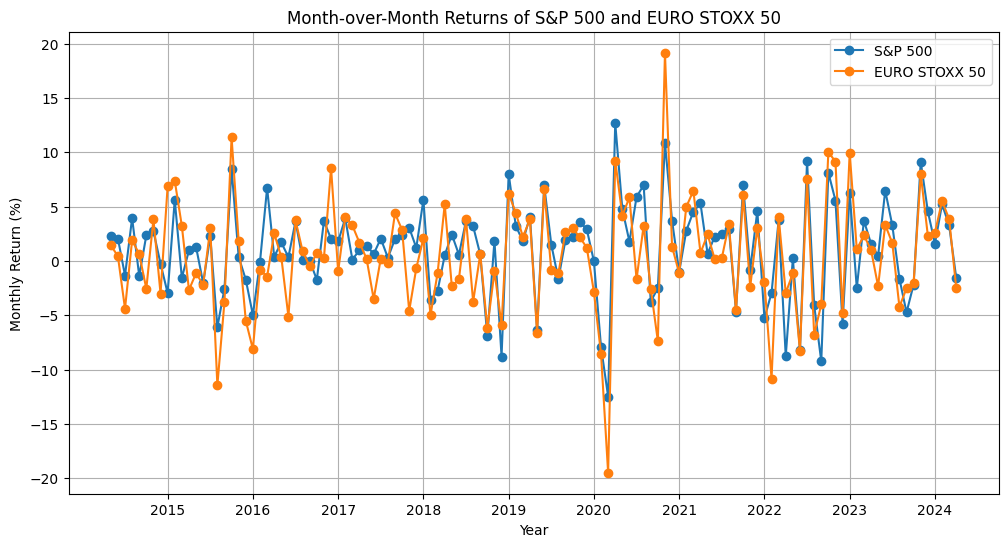

In [34]:
plt.figure(figsize=(12, 6))

# Plot S&P 500 Monthly Returns
plt.plot(sp500_monthly.index.astype(str), sp500_monthly["monthly_return"], label="S&P 500", marker="o")

# Plot EURO STOXX 50 Monthly Returns
plt.plot(euro50_monthly.index.astype(str), euro50_monthly["monthly_return"], label="EURO STOXX 50", marker="o")

# Show years only to have a crystal clear viz
tick_positions = [str(date) for date in sp500_monthly.index if date.month == 1]  # Convert Period in str
tick_labels = [str(date.year) for date in sp500_monthly.index if date.month == 1]

plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=0)  # Manteniamo etichette pulite

plt.xlabel("Year")
plt.ylabel("Monthly Return (%)")
plt.title("Month-over-Month Returns of S&P 500 and EURO STOXX 50")
plt.legend()
plt.grid()
plt.show()

## Yearly

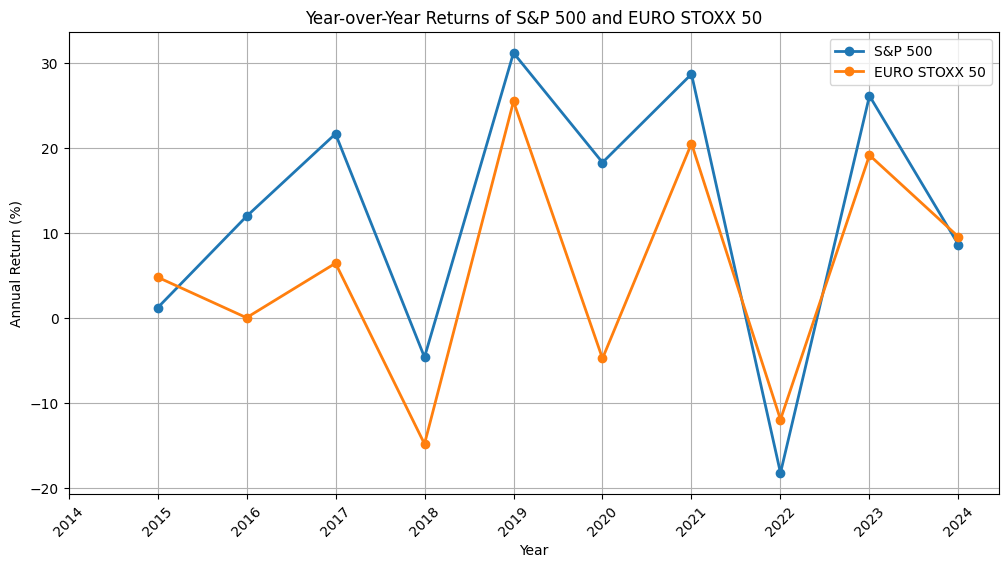

In [41]:
plt.figure(figsize=(12, 6))

# Plot S&P 500 Annual Returns
plt.plot(sp500_annual.index.astype(str), sp500_annual["annual_return"], label="S&P 500", marker="o", linestyle="-", linewidth=2)

# Plot EURO STOXX 50 Annual Returns
plt.plot(euro50_annual.index.astype(str), euro50_annual["annual_return"], label="EURO STOXX 50", marker="o", linestyle="-", linewidth=2)

# Show years only to have a crystal clear viz
plt.xticks(sp500_annual.index.astype(str), rotation=45)

plt.xlabel("Year")
plt.ylabel("Annual Return (%)")
plt.title("Year-over-Year Returns of S&P 500 and EURO STOXX 50")
plt.legend()
plt.grid()
plt.show()

# 2) Average daily yield by day of the week

In [44]:
# Compute daily percentage change
sp500_daily = sp500[["Date", "Close"]].copy()
euro50_daily = euro50[["Date", "Close"]].copy()

sp500_daily["daily_return"] = sp500_daily["Close"].pct_change() * 100
euro50_daily["daily_return"] = euro50_daily["Close"].pct_change() * 100

# Extract the day of the week
sp500_daily["day_of_week"] = sp500_daily["Date"].dt.day_name()
euro50_daily["day_of_week"] = euro50_daily["Date"].dt.day_name()

In [45]:
sp500_daily.head()

,Date,Close,daily_return,day_of_week
0,2014-04-15 04:00:00,153.937714,NaN,Tuesday
1,2014-04-16 04:00:00,155.550644,1.047781,Wednesday
2,2014-04-17 04:00:00,155.767929,0.139688,Thursday
3,2014-04-21 04:00:00,156.311081,0.348693,Monday
4,2014-04-22 04:00:00,157.021439,0.454451,Tuesday


In [46]:
euro50_daily.head()

,Date,Close,daily_return,day_of_week
0,2014-04-14 22:00:00,3091.520020,NaN,Monday
1,2014-04-15 22:00:00,3139.260010,1.544224,Tuesday
2,2014-04-16 22:00:00,3155.810059,0.527196,Wednesday
3,2014-04-21 22:00:00,3199.689941,1.390448,Monday
4,2014-04-22 22:00:00,3175.969971,-0.741321,Tuesday


In [47]:
# Compute average daily return per weekday
sp500_weekly_avg = sp500_daily.groupby("day_of_week")["daily_return"].mean()
euro50_weekly_avg = euro50_daily.groupby("day_of_week")["daily_return"].mean()

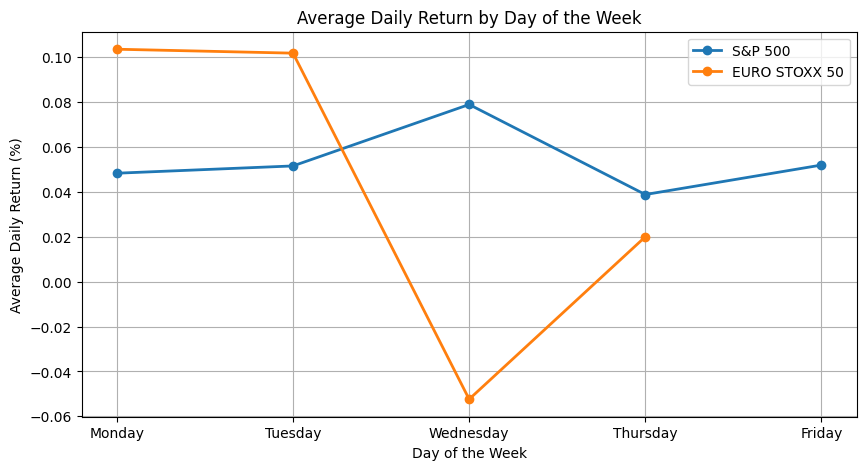

In [50]:
# Ordinare i giorni della settimana per garantire che siano nell'ordine corretto
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# Reindex per ordinare correttamente
sp500_weekly_avg = sp500_weekly_avg.reindex(days_order)
euro50_weekly_avg = euro50_weekly_avg.reindex(days_order)

plt.figure(figsize=(10, 5))

# Plot S&P 500 Weekly Avg
plt.plot(sp500_weekly_avg.index, sp500_weekly_avg, label="S&P 500", marker="o", linestyle="-", linewidth=2)

# Plot EURO STOXX 50 Weekly Avg
plt.plot(euro50_weekly_avg.index, euro50_weekly_avg, label="EURO STOXX 50", marker="o", linestyle="-", linewidth=2)

# Formatting
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Return (%)")
plt.title("Average Daily Return by Day of the Week")
plt.legend()
plt.grid()
plt.show()

In [51]:
"Friday" in euro50_daily["day_of_week"].values

False

In [52]:
"Saturday" in euro50_daily["day_of_week"].values

False

In [53]:
"Sunday" in euro50_daily["day_of_week"].values

True

In [54]:
"Saturday" in sp500_daily["day_of_week"].values

False

In [55]:
"Saturday" in sp500_daily["day_of_week"].values

False

Friday is missing from the EURO STOXX 50 plot because we don’t have any data for that day in the dataset. This suggests that the market was likely closed on Fridays during the analyzed period, or data for those days is missing.

Similarly, Saturday and Sunday do not appear because stock markets are generally closed on weekends. Even if a Sunday is present in the dataset, its return cannot be calculated because there is no closing price from the previous day (Saturday) to compare against. As a result, pct_change() returns NaN for Sundays, effectively removing them from the analysis.

# 3) Days with maximum and minimum yield

In [56]:
# Find the day with the highest and lowest daily return for S&P 500
sp500_max_return = sp500_daily.loc[sp500_daily["daily_return"].idxmax()]
sp500_min_return = sp500_daily.loc[sp500_daily["daily_return"].idxmin()]

# Find the day with the highest and lowest daily return for EURO STOXX 50
euro50_max_return = euro50_daily.loc[euro50_daily["daily_return"].idxmax()]
euro50_min_return = euro50_daily.loc[euro50_daily["daily_return"].idxmin()]

In [57]:
sp500_max_return

,1495
Date,2020-03-24 04:00:00
Close,228.953186
daily_return,9.060337
day_of_week,Tuesday


In [60]:
sp500_min_return

,1489
Date,2020-03-16 04:00:00
Close,224.525604
daily_return,-10.942383
day_of_week,Monday


In [61]:
euro50_max_return

,1982
Date,2022-03-08 23:00:00
Close,3766.02002
daily_return,7.438186
day_of_week,Tuesday


In [62]:
euro50_min_return

,1478
Date,2020-03-11 23:00:00
Close,2545.22998
daily_return,-12.401398
day_of_week,Wednesday


The identified days are not random:

- The lowest returns coincide with periods of extreme market fear (COVID-19 crash).
- The highest returns align with rebounds following crises and moments of high volatility.

➡️ This analysis confirms that extreme market movements are often driven by major macroeconomic and geopolitical events.

# 4) Average daily volume

In [63]:
# Compute the average daily volume for each index
sp500_avg_volume = sp500["Volume"].mean()
euro50_avg_volume = euro50["Volume"].mean()

print(f"📊 S&P 500 - Average Daily Trading Volume: {sp500_avg_volume:,.0f}")
print(f"📊 EURO STOXX 50 - Average Daily Trading Volume: {euro50_avg_volume:,.0f}")

📊 S&P 500 - Average Daily Trading Volume: 91,289,038
📊 EURO STOXX 50 - Average Daily Trading Volume: 42,186,348


Trading volume on the S&P 500 is more than twice that of the EURO STOXX 50
- This confirms that the U.S. stock market has significantly higher liquidity and investor participation compared to the European market.
- Global investors are more focused on U.S. stocks, making the S&P 500 a world-leading benchmark index.
- The EURO STOXX 50 is more region-specific to the European market and, therefore, less liquid compared to the S&P 500.